In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [66]:
#statistical analysis on features:
df=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/PhonationData/stat_ph/phonationfeaturesst_seg_train_stat.csv')
#train and test data:
df_train=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/PhonationData/phonationfeaturesst_seg_dev.csv')
df_test=pd.read_csv('/home/vboxuser/VoiceFiles/Voice4PD-MSA-Tool-global_V2/PhonationData/phonationfeaturesst_seg_test.csv')

In [67]:
req_features=df[(df['p_HC_DP']<0.05) | (abs(df['p_HC_DP.1'])>0.4)]
feature_list=req_features['Unnamed: 0'].tolist()

In [68]:
df_train.replace({'Group':{"HC":0,"DP":1}},inplace=True)

In [69]:
X_train=df_train[df_train.columns.intersection(feature_list)]

In [70]:
pca=PCA(n_components=4)

In [71]:
x_trainpca=pca.fit_transform(X_train)
pca_df=pd.DataFrame(x_trainpca,columns=["PCA1","PCA2","PCA3","PCA4"])

In [72]:
pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-5.478125,-2.408424,2.642498,-1.576816
1,45.322642,-16.672962,-11.126468,1.932616
2,21.099247,-9.535600,-5.933788,-1.982242
3,9.557194,-10.806014,0.916838,-4.359575
4,17.115950,-6.414704,-2.525311,-1.620321


In [73]:
Y_train=df_train['Group']

In [74]:
print(pca_df.shape)
print(Y_train.shape)

(5023, 4)
(5023,)


In [75]:
from sklearn.preprocessing import StandardScaler
std_Scaler=StandardScaler()
std_Scaler

StandardScaler()

In [76]:
X=std_Scaler.fit_transform(pca_df)

In [77]:
Y=Y_train

In [78]:
from sklearn.cluster import KMeans

In [79]:
km1 = KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, random_state=66, tol=0.0001, verbose=2)

y=km1.fit_predict(X)

Initialization complete
Iteration 0, inertia 26657.328288946297.
Iteration 1, inertia 17182.650709997142.
Iteration 2, inertia 17062.15193014039.
Iteration 3, inertia 16984.37037463285.
Iteration 4, inertia 16925.03873801647.
Iteration 5, inertia 16884.656125352543.
Iteration 6, inertia 16850.763113969922.
Iteration 7, inertia 16824.88281195169.
Iteration 8, inertia 16799.51463657745.
Iteration 9, inertia 16776.06638139578.
Iteration 10, inertia 16751.055571593275.
Iteration 11, inertia 16733.28700664791.
Iteration 12, inertia 16723.205976102203.
Iteration 13, inertia 16714.338195851782.
Iteration 14, inertia 16698.57543911261.
Iteration 15, inertia 16688.41555445559.
Iteration 16, inertia 16679.224112415286.
Iteration 17, inertia 16674.482969432866.
Iteration 18, inertia 16670.38815517391.
Iteration 19, inertia 16665.162282810117.
Iteration 20, inertia 16660.724357109968.
Iteration 21, inertia 16657.20975935938.
Iteration 22, inertia 16654.87705624984.
Iteration 23, inertia 16650.8162

In [80]:
len(y)

5023

In [81]:
df_train['clusters']=y

In [82]:
cluster=df_train[['subject','Group','clusters']]

In [83]:
cluster

,subject,Group,clusters
0,300_P_0.wav,0,0
1,300_P_1.wav,0,0
2,300_P_10.wav,0,0
3,300_P_11.wav,0,0
4,300_P_12.wav,0,0
...,...,...,...
5018,713_P_5.wav,0,1
5019,713_P_6.wav,0,1
5020,713_P_7.wav,0,1
5021,713_P_8.wav,0,0


In [84]:
from sklearn import metrics
metrics.accuracy_score(Y,y)

0.5273740792355166

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y,y))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      3878
           1       0.21      0.38      0.27      1145

    accuracy                           0.53      5023
   macro avg       0.48      0.47      0.46      5023
weighted avg       0.63      0.53      0.56      5023



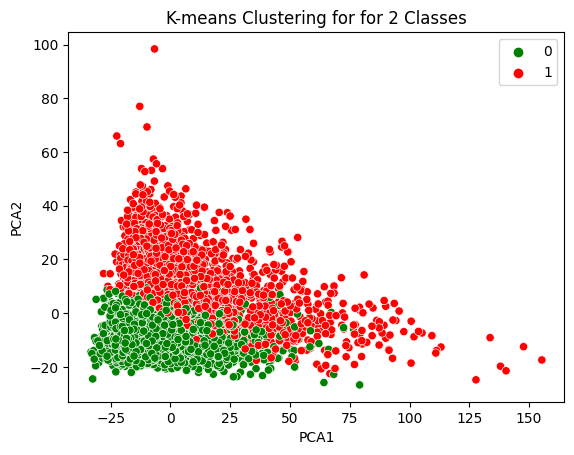

In [86]:
sns.scatterplot(x="PCA1",y="PCA2",hue=y,palette=['green','red'],data=pca_df)
plt.title("K-means Clustering for for 2 Classes")
plt.show()

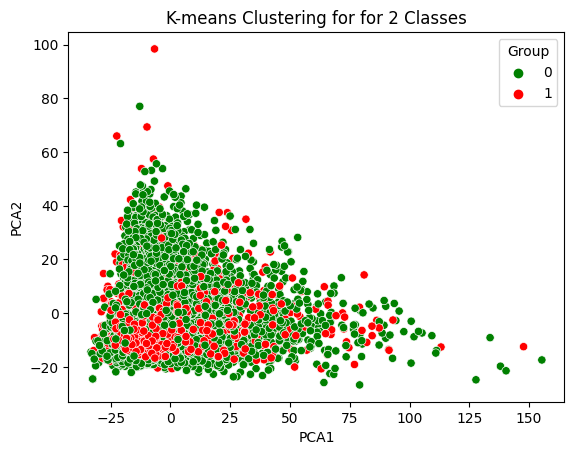

In [87]:
sns.scatterplot(x="PCA1",y="PCA2",hue=Y,palette=['green','red'],data=pca_df)
plt.title("K-means Clustering for for 2 Classes")
plt.show()

In [88]:
#cluster.to_csv('/home/vboxuser/VoiceFiles/kmeans.csv')

In [89]:
selection=cluster[cluster['Group']==cluster['clusters']]

In [90]:
selection.groupby(['Group'])['Group'].count()

Group
0    2218
1     431
Name: Group, dtype: int64

2649  correctly classified data points

In [91]:
selection

,subject,Group,clusters
0,300_P_0.wav,0,0
1,300_P_1.wav,0,0
2,300_P_10.wav,0,0
3,300_P_11.wav,0,0
4,300_P_12.wav,0,0
...,...,...,...
5008,713_P_39.wav,0,0
5010,713_P_40.wav,0,0
5016,713_P_46.wav,0,0
5021,713_P_8.wav,0,0


In [92]:
new_df=df_train[df_train.index.isin(selection.index)]

In [93]:
new_df.shape

(2649, 31)

In [94]:
new_df.groupby(['Group'])['Group'].count()

Group
0    2218
1     431
Name: Group, dtype: int64

In [95]:
X_train=new_df[new_df.columns.intersection(feature_list)]
Y_train=new_df['Group']

In [96]:
X_train.shape

(2649, 16)

In [97]:
Y_train.shape

(2649,)

In [98]:
! pip install imblearn --quiet

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)

X_train_resampled, Y_train_resampled = sm.fit_resample(X_train,Y_train)
df_train_upsampled = pd.concat([pd.DataFrame(Y_train_resampled), pd.DataFrame(X_train_resampled)], axis=1)

from sklearn.utils import resample

df_1=new_df[new_df['Group']==1]
df_other=new_df[new_df['Group']!=1]
df_upsampled=resample(df_1,random_state=42,n_samples=2228,replace=True)
df_train_upsampled=pd.concat([df_upsampled,df_other])

In [99]:
df_train_upsampled.groupby(['Group'])['Group'].count()

Group
0    2218
1    2218
Name: Group, dtype: int64

In [100]:
df_train_upsampled

,Group,avg ppq,std DF0,std DDF0,std Jitter,std ppq,std logE,skewness DF0,skewness DDF0,skewness Jitter,skewness Shimmer,skewness apq,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis logE
0,0,3.304526,14.054193,19.669178,4.727189,4.656089,5.357163,1.831292,-0.356258,3.726725,3.563109,2.696940,14.129969,8.746996,16.117512,15.020170,-0.450599
1,0,1.908758,8.237100,13.521247,4.786674,4.212096,3.455829,4.052650,-0.769876,6.655218,2.104708,1.080713,46.655725,30.354837,51.932924,5.046667,-0.487237
2,0,2.291457,11.486531,16.360935,5.077145,4.586097,3.469334,4.674117,-0.459939,5.581281,2.650319,1.631476,31.587241,17.874929,35.549297,8.486273,1.440022
3,0,2.408202,10.560434,14.010489,3.955414,3.713727,4.814435,2.821922,-0.300459,4.797805,3.194715,1.154234,23.995068,12.011855,28.412905,14.547425,0.434183
4,0,2.731858,12.669660,18.539904,5.446981,5.000735,6.311549,2.728927,0.425365,5.122478,3.309690,2.135642,29.220998,16.726301,31.792951,11.423945,-0.448466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,1,5.002662,20.917079,30.865998,8.314404,7.713349,5.715236,0.287717,-0.284378,3.628302,2.830284,1.016814,13.166922,5.256371,13.301318,10.734899,1.022927
4432,1,7.297984,26.299642,39.141018,7.752396,9.506050,8.187902,0.963446,-0.324869,2.989287,5.257427,0.833110,8.720606,4.468094,9.107896,36.089430,-0.650536
4433,1,7.680558,21.175793,30.935609,5.627851,9.221257,8.964974,3.029162,-0.241439,4.195868,2.584190,0.598895,14.745040,6.612588,20.881206,6.972177,-0.879232
4434,1,5.012485,20.460727,32.428133,7.479473,9.379910,4.923933,1.461031,0.503773,3.314229,5.407458,1.578120,11.184416,10.031410,11.561009,40.732923,1.883801


In [101]:
X_train_resampled=df_train_upsampled.drop(['Group'],axis=1)
Y_train_resampled=df_train_upsampled['Group']

In [102]:
X_train_resampled.shape

(4436, 16)

In [103]:
import Normalization as n
X=n.normalize_train(X_train_resampled)

In [104]:
Y=Y_train_resampled

In [105]:
df_test=df_test.fillna(0)

In [106]:
#X_test=df_test[df_test.columns.intersection(feature_list)]
#df_test[df_test.index.isin(selection.index)]
df_test.replace({'Group':{"HC":0,"DP":1}},inplace=True)
#Y_test=df_test['Group']

In [107]:
import itertools
subject = df_test['subject']
# empty list
result = []

iterator = itertools.groupby(subject, lambda string: string.split('_')[0])

for element, group in iterator:
   
   result.append(list(group))

In [108]:
len(result)

56

In [109]:
from sklearn.svm import SVC

In [110]:
X_test=df_test[df_test.columns.intersection(feature_list)]
X_test=n.normalize_test(X_test)
Y_test=df_test['Group']

In [111]:
Y_test.shape

(4580,)

In [112]:
SVM_model = SVC(kernel='rbf',C=1,gamma=0.1, class_weight='balanced')
SVM_model.fit(X,Y)
Y_predict_SVM=SVM_model.predict(X_test)
acc= metrics.accuracy_score(Y_test,Y_predict_SVM)

In [113]:
acc

0.5932314410480349

In [114]:
param_grid= {'C':[0.1,1],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf']
            }

In [115]:
from sklearn.model_selection import GridSearchCV
grid1= GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)
grid1.fit(X,Y)
print(grid1.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time=   1.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.962 total time=   1.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   1.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   1.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   2.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.954 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,Y_predict_SVM))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      3311
           1       0.33      0.47      0.39      1269

    accuracy                           0.59      4580
   macro avg       0.55      0.55      0.54      4580
weighted avg       0.64      0.59      0.61      4580



In [117]:
from statistics import mode

In [127]:
true_per=[] #true percentage
out_per=[] #predicted percentage
true_output=[]
pred_output=[]
true_count=[] #true count
count=[] #predicted count

for i in range (0,len(result)):
    test=df_test[df_test['subject'].isin(result[i])] 
    X_test=test[test.columns.intersection(feature_list)]
    X_test=n.normalize_test(X_test)
    Y_test=test['Group']

    Y_predict=SVM_model.predict(X_test)
    
    per_pred_dp=np.sum(Y_predict==1)/Y_predict.shape[0]*100
    count_pred_dp=np.sum(Y_predict==1)
    count.append(count_pred_dp)
    
    
    if per_pred_dp>50:
        y_=1
    else:
        y_=0
    
    y=mode(Y_test)
    per=np.sum(Y_test==1)/Y_test.shape[0]*100
    count_true_dp=np.sum(Y_test==1)
    true_count.append(count_true_dp)
    
    
    true_per.append(per)
    out_per.append(per_pred_dp)
    true_output.append(y)
    pred_output.append(y_)
    
print(classification_report(true_output,pred_output))
print(metrics.accuracy_score(true_output,pred_output))
    
print(confusion_matrix(true_output,pred_output))    

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        39
           1       0.35      0.47      0.40        17

    accuracy                           0.57        56
   macro avg       0.54      0.54      0.53        56
weighted avg       0.61      0.57      0.59        56

0.5714285714285714
[[24 15]
 [ 9  8]]


In [119]:
df_pred=pd.DataFrame({'percentage of depression':out_per,'label':pred_output,'true_label':true_output})

df_pred_hc=df_pred.loc[df_pred['true_label']==0]
df_pred_hc.sort_values(by=['percentage of depression'],ascending=False)

df_pred_hc.shape

(39, 3)

<AxesSubplot: xlabel='percentage of depression', ylabel='true_label'>

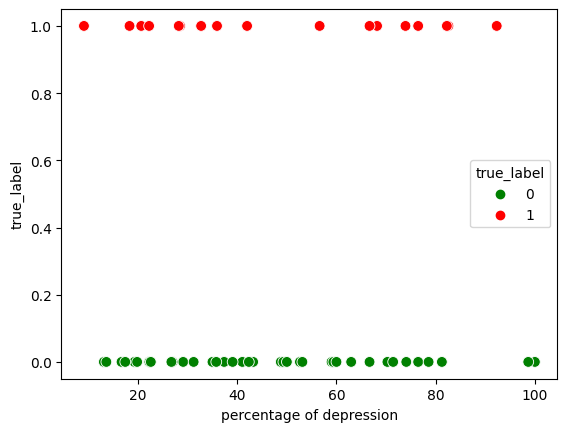

In [120]:
import seaborn as sns

sns.scatterplot(x='percentage of depression',y='true_label',data=df_pred,s=60,hue='true_label',palette=['green','red'])

-------------------- REFERENCE --------------------

In [121]:
len(result[24])

72

In [122]:
test=df_test[df_test['subject'].isin(result[24])] 
X_test=test[test.columns.intersection(feature_list)]
X_test=n.normalize_test(X_test)
Y_test=test['Group']
Y_predict_SVM=SVM_model.predict(X_test)

In [123]:
X_test.shape

(72, 16)

In [124]:
(Y_predict_SVM)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0])

In [125]:
np.array(Y_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])